# Utilizando la visualización de datos para contar historias

## Objetivos de la sesión
En esta sesión repasaremos los tipos de comparaciones de datos y qué visualizaciones son las más adecuadas para cada uno.

## Introducción
Según un antiguo dicho, una imagen vale más que mil palabras. La gente ha estado utilizando imágenes para contar historias y vender ideas durante siglos, y como analistas de datos o científicos de datos hoy en día, no debemos limitarnos a realizar análisis sobre los datos, sino que también tenemos que utilizar los datos para ayudarnos a contar historias. Las personas que pueden y tienen la paciencia para entender datos complejos son muy pocas, por lo que necesitamos usar la "imagen" para contar nuestras historias a la gente, y que puedan "ver" datos complejos de la manera que esperamos.

En esta lección comenzaremos revisando dos principios básicos de una buena narración con datos. Luego examinaremos los diferentes tipos de relaciones entre los datos y la elección del gráfico más apropiado para representar visualmente cada tipo de relación.

## Principios de la buena narración de historias
Una buena narración a través de la visualización de datos tiene dos principios fundamentales:
* Hacer que la información que queremos transmitir sea relevante y llamativa para la audiencia.
* Facilitar al público la interpretación precisa de la información que queremos transmitir.

La visualización de datos es buena para extraer información relevante del mundo real y presentar una "instantánea" sostenida para que la audiencia pueda examinarla en profundidad a lo largo del tiempo. Sin embargo, incluso en la visualización de datos, la información contenida en los gráficos puede ser abrumadora y ruidosa (es decir, tener mucha información irrelevante puede distraer a la audiencia del punto principal). Se deben emplear técnicas para resaltar la información principal que queremos transmitir y así que la audiencia pueda captarla fácilmente.

Un ejemplo de técnica para presentar información saliente y relevante es utilizando el modo visual apropiado (por ejemplo, color, diseño, tamaño, perspectiva, etc.). Considere el siguiente escenario donde se espera que la audiencia "vea" con qué frecuencia aparece la palabra data en un artículo. ¿Cuál de las dos presentaciones permite a la audiencia capturar mejor la información?

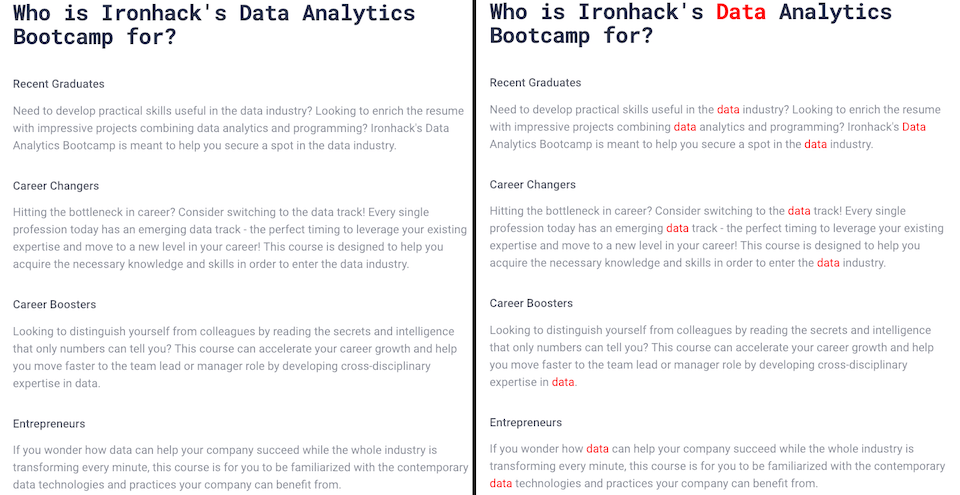



Como se ha visto en el ejemplo anterior, el uso del color puede ayudar a la audiencia a capturar más fácilmente la información que desea transmitir.

En muchas ocasiones tratermos que la audiencia entienda nuestros datos y las relaciones entre ellos. En este caso, debemos elegir el tipo de gráfico apropiado. Veamos los siguientes gráficos que muestran la amplia estructura de inversión de la industria de aplicaciones de TI en China (según datos de la Oficina Nacional de Estadísticas de China):

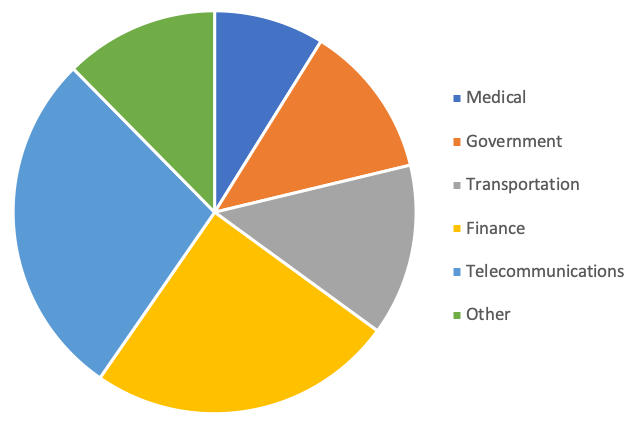

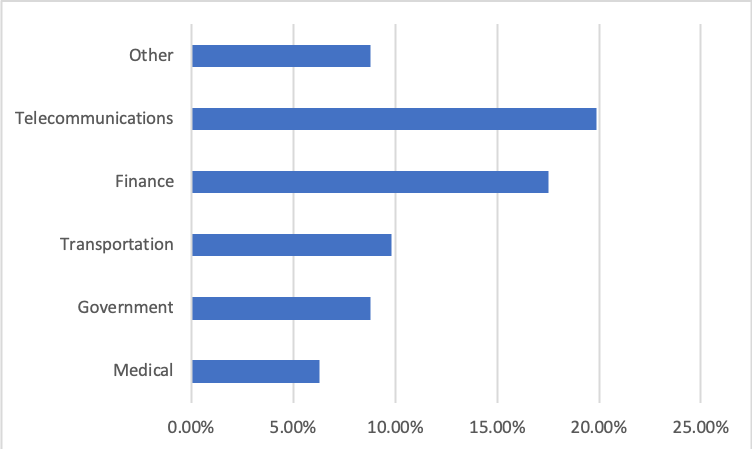

Como se ha visto en el ejemplo anterior, el diagrama de tarta permite a la audiencia percibir mejor la proporción de las diferentes categorías de datos. Y el gráfico de barras permite a la audiencia clasificar las categorías de datos por valor. Por lo tanto, es importante entender qué tipo de gráfico es apropiado para contar qué tipo de historias. En el resto de esta lección, profundizaremos en los propósitos de los diferentes tipos de gráficos.

## Uso del tipo de gráfico apropiado para el Storytelling

A continuación repasaremos los tipos de gráficos que hemos aprendido hasta ahora y explicaremos cuándo debemos usar cada uno de ellos para presentar qué tipo de relaciones entre los datos. Utilizaremos el conjunto de datos de vehículos para ilustrar estas visualizaciones.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vehicles = pd.read_csv("./data/vehicles.csv")

### Diagramas de dispersión

Una visualización clara y concisa que puede utilizarse para determinar la existencia y el tipo de relación entre dos variables es el diagrama de dispersión. Si queremos representar 3 variables, podemos añadir dimensiones adicionales a nuestro gráfico usando color o tamaño. Sin embargo, debemos tener cuidado de no sobrecargar el gráfico de información. Esto hará que nuestra gráfica ya no sea clara y concisa. En el caso de tener más de dos variables que nos gustaría comparar por parejas, podemos optar por utilizar una matriz de dispersión. Un gráfico de dispersión puede ayudarnos a detectar si existe una relación lineal entre dos variables o si existe un tipo diferente de relación (por ejemplo, una relación exponencial o logarítmica). En algunos casos, podemos observar una distribución aleatoria de puntos, lo que significa que no hay relación entre las dos variables. Las gráficas de dispersión también son útiles para identificar valores atípicos y ciertos aspectos subyacentes en la distribución de nuestros datos.

Los siguientes escenarios se presentan como ejemplos para elegir qué tipo de diagrama de dispersión se debe utilizar en diferentes situaciones.

#### Escenario 1: Dos variables
Tenemos dos variables City MPG y Highway MPG que están linealmente correlacionadas. En este escenario, una gráfica de dispersión bidimensional de un solo color es adecuada para representar la relación lineal de las variables:

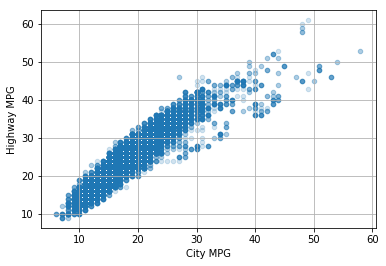

In [5]:
vehicles.plot.scatter(x="City MPG", y="Highway MPG", alpha=0.2, grid=True);

#### Escenario 2: Tres variables
Además del City MPG y el Highway MPG, ahora tenemos una tercera variable: CO2 Emission Grams/Mile. ¿Cómo visualizar la tercera dimensión en una gráfica de dispersión bidimensional? La solución es usar el color o el tamaño del punto.

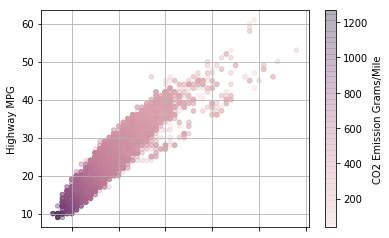

In [10]:
cmap = sns.cubehelix_palette(as_cmap=True)
vehicles.plot.scatter(x="City MPG", y="Highway MPG", c="CO2 Emission Grams/Mile", cmap=cmap, alpha=0.2, grid=True);

#### Escenario 3: Más de tres variables
Pero el conjunto de datos de los vehículos tiene 9 variables numéricas. ¿Cómo visualizamos 9 variables en un gráfico de dispersión bidimensional? Bueno, una sola gráfica de dispersión obviamente no satisface nuestras necesidades. Podemos usar una matriz de diagramas de dispersión para visualizar las relaciones por pares entre esas variables.

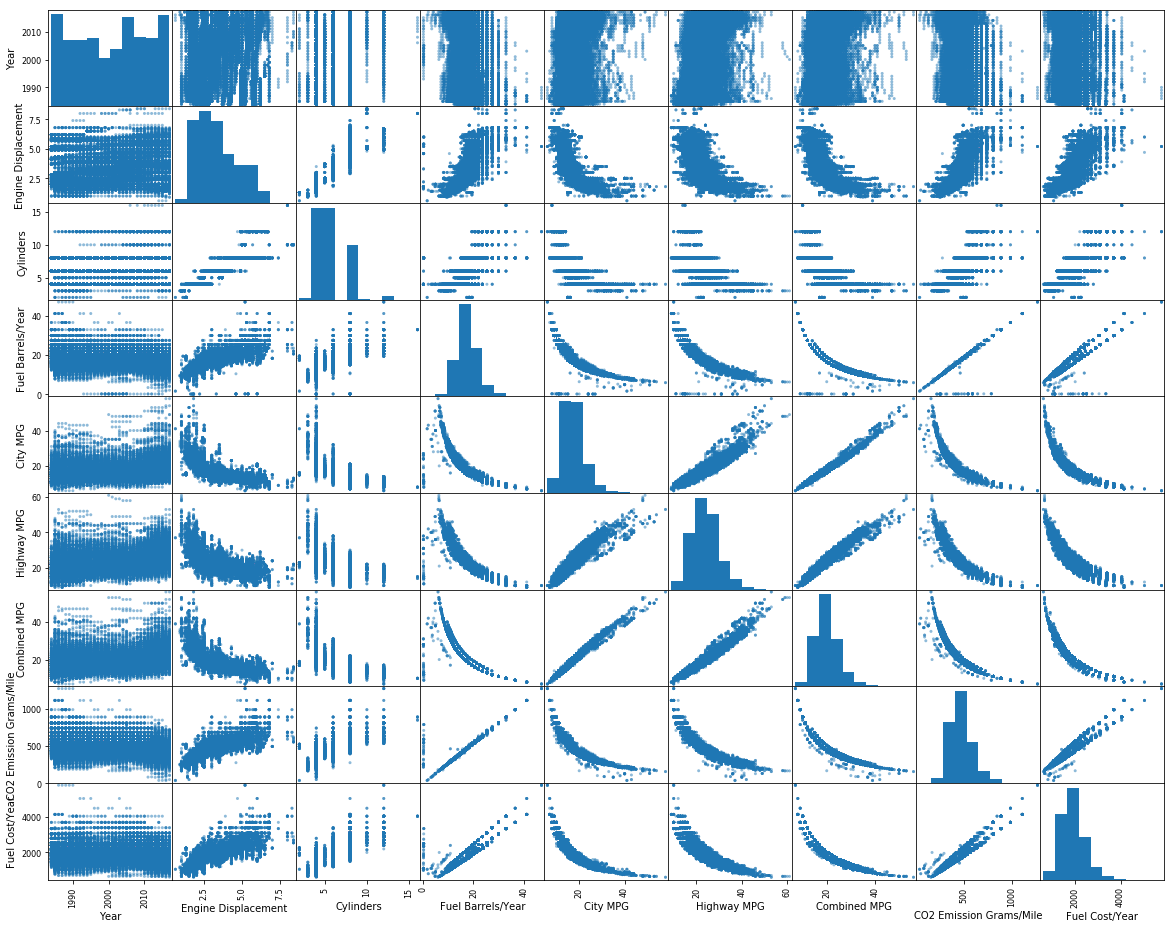

In [13]:
pd.plotting.scatter_matrix(vehicles, figsize=(20,16));

En la matriz anterior, los subgráficos en la diagonal pueden ser ignorados porque son la relación de cada variable consigo misma. En otras subparcelas, se puede decir que algunas variables tienen relaciones lineales (por ejemplo, Fuel Barrels/Year vs CO2 Emission Grams/Mile), relaciones curvilíneas (por ejemplo, Fuel Barrels/Year vs Combined MPG), y ninguna relación (por ejemplo, Año vs. Todos los demás).

### Gráficos de líneas

Los gráficos de líneas son similares a los diagramas de dispersión. Hay diferentes maneras de conectar los puntos en un gráfico de líneas. Si bien podemos simplemente conectar las líneas sin buscar una tendencia, también podemos crear una tendencia lineal o utilizar otros métodos como la interpolación.

El uso de un gráfico de líneas hace más fácil representar gráficamente más de una variable a la vez utilizando los mismos ejes x e y. Para ello, primero debemos remodelar los datos utilizando la función `melt`.

La función `melt` creará un conjunto de datos que tenga todos los valores MPG en una columna y otra columna indicará de qué tipo de MPG se trata. Luego utilizamos esta columna para trazar el color.

In [15]:
m = pd.melt(vehicles[['City MPG', 'Highway MPG', 'CO2 Emission Grams/Mile']],
            id_vars='CO2 Emission Grams/Mile', var_name='MPG')

m.head()

,CO2 Emission Grams/Mile,MPG,value
0,522.764706,City MPG,18
1,683.615385,City MPG,13
2,555.437500,City MPG,16
3,683.615385,City MPG,13
4,555.437500,City MPG,14


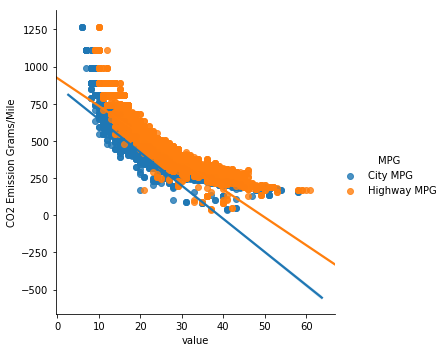

In [17]:
sns.lmplot(x='value',y='CO2 Emission Grams/Mile', hue='MPG', data=m, fit_reg=True);

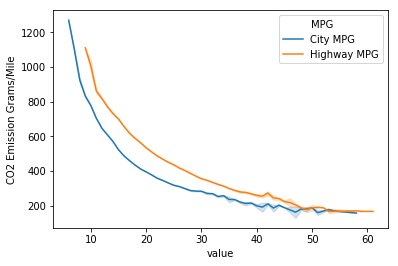

In [19]:
sns.lineplot(x='value',y='CO2 Emission Grams/Mile', hue='MPG', data=m);

### Histogramas
Los histogramas se utilizan normalmente para ilustrar la distribución de los datos. Al igual que las gráficas de dispersión, los histogramas también pueden ayudarnos a identificar valores atípicos. También pueden mostrarnos si hay una tendencia general de asimetría o simetría en los datos. Con una cuidadosa selección de bins también podemos identificar si los datos unimodales o si son bimodales o multimodales.

Recuerde que el número predeterminado de bins es 10.

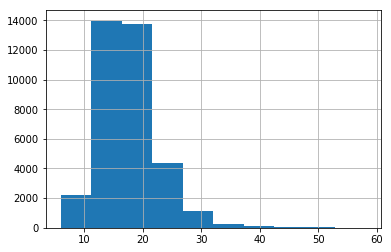

In [21]:
vehicles['City MPG'].hist();

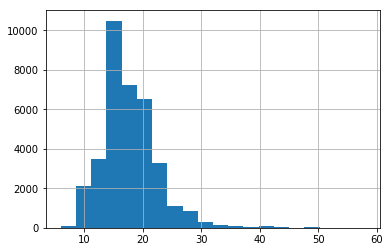

In [23]:
vehicles['City MPG'].hist(bins=20);

### Gráficos de barras
Los gráficos de barras se pueden utilizar para comparar categorías dentro de variables categóricas. Podemos utilizar estos gráficos para la comparación entre períodos de tiempo (por ejemplo, este año vs. el año pasado) o entre dos subgrupos de la población (como los hombres y las mujeres). En este ejemplo estamos comparando dos variables que describen el MPG de un vehículo.

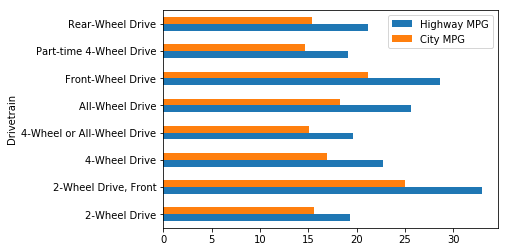

In [25]:
vehicles_mean = vehicles[["Highway MPG", "City MPG", "Drivetrain"]].groupby(["Drivetrain"]).agg("mean")
vehicles_mean.plot.barh();

### Gráficos de tarta
Muchos expertos en el campo de la visualización de datos recomiendan no utilizar el gráfico de tarta. Los gráficos de tarta tienen la intención de representar la diferencia proporcional entre los diferentes grupos en una variable categórica. Sin embargo, ver los diferentes grupos como una fracción de un todo significa una pérdida de información sobre los datos originales. Siempre hay visualizaciones más adecuadas que los gráficos de tarta. La alternativa más obvia es un gráfico de barras.

## Resumen
En esta lección aprendimos sobre los principales tipos de visualizaciones y para qué se pueden utilizar. También aprendimos qué visualizaciones no utilizar para comunicar nuestros hallazgos de manera efectiva.